<center><h1>Numpy</h1></center>

NumPy（Numerical Python的简称）是Python数值计算最重要的基础包。大多数提供科学计算的包都是用NumPy的数组作为构建基础。

NumPy的部分功能如下：

- ndarray，一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组。
- 用于对整组数据进行快速运算的标准数学函数（无需编写循环）。
- 用于读写磁盘数据的工具以及用于操作内存映射文件的工具。
- 线性代数、随机数生成以及傅里叶变换功能。
- 用于集成由C、C++、Fortran等语言编写的代码的A C API。


NumPy本身并没有提供多么高级的数据分析功能，理解NumPy数组以及面向数组的计算将有助于你更加高效地使用诸如pandas之类的工具。因为NumPy是一个很大的题目。



有了list为什么还要有Numpy呢？  

NumPy之于数值计算特别重要的原因之一，是因为它可以高效处理大数组的数据。这是因为：

- NumPy是在一个连续的内存块中存储数据，独立于其他Python内置对象。NumPy的C语言编写的算法库可以操作内存，而不必进行类型检查或其它前期工作。比起Python的内置序列，NumPy数组使用的内存更少。
- NumPy可以在整个数组上执行复杂的计算，而不需要Python的for循环。

要搞明白具体的性能差距，考察一个包含一百万整数的数组，和一个等价的Python列表：


In [ ]:
import numpy as np

In [ ]:
my_arr = np.arange(1000000)
%time for _ in range(10): my_arr2 = my_arr * 2

In [ ]:
my_list = list(range(1000000))
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

<h1>本章节内容如下</h1>


* 数组的创建
* 数组的操作
* 数组的计算
* 统计基础和矩阵运算

# 3.1 数组的创建
在导入Numpy库时，我们通过as将np作为Numpy的别名，导入方式如下：
> import numpy as np


先list中创建Numpy数组。


In [ ]:
import numpy as np
my_list = [1, 2, 3, 4, 5]
my_numpy_list = np.array(my_list)

In [ ]:
my_list

In [ ]:
my_numpy_list

In [ ]:
type(my_numpy_list)

要想得到二维数组，则需要创建一个包含列表为元素的列表，如下所示。


In [ ]:
second_list = [[1,2,3], [5,4,1], [3,6,7]]
new_2d_arr = np.array(second_list)


In [ ]:
new_2d_arr

有时为了方便数据操作，我们需要将数组转化为列表，使用tolist()函数即可。


In [ ]:
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [7, 8, 9, 10]])

In [ ]:
c

In [ ]:
type(c)

In [ ]:
c.tolist()

In [ ]:
type(c.tolist())

还可以通过给array()函数产地Python的序列对象来创建数组，如果传递的是多层嵌套的序列，将创建多维数组，如下面的变量c


In [ ]:
a = np.array([1, 2, 3, 4])

b = np.array((5, 6, 7, 8))
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [7, 8, 9, 10]])


In [ ]:
type(a),type(b),type(c)

In [ ]:
a,b,c

In [ ]:
c.dtype #查看c的数据类型

数组的大小可以通过其shape属性获得

In [ ]:
a.shape#查看a的数组维度


In [ ]:
c.shape

数组a的shape只有一个元素4，因此它是一维数组。而数组c的shape有两个元素，因此它是二维数组，其中第0轴的长度为3，第1轴的长度为4，如图所示。

![avatar](image/Chapter3_1.png)

还可以通过修改数组的shape属性，在保持数组元素个数不变的情况下，改变数组每个轴的长度。下面的例子将数组c的shape改为(4,3)，注意从(3,4)改为(4,3)并不是对数组进行转置，而是改变每个轴的大小，数组元素在内存中的位置并没有改变

In [ ]:
c.shape = 4,3

In [ ]:
c

当某个轴的长度为−1时，相当于占位符，这个−1位置上将根据数组元素的个数自动计算此轴的长度，因此下面的代码将数组c的shape改为了(2,6)，但这里的6不需要人工去计算，以-1替代，由计算机自动计算填充。


In [ ]:
c.shape = 2,-1

In [ ]:
c

使用数组的reshape方法，可以创建一个改变了尺寸的新数组，原数组的shape保持不变。


In [ ]:
d = a.reshape((2,2))


In [ ]:
d

In [ ]:
a

使用reshape方法新生成的数组和原数组共用一个内存，不管改变哪个都会互相影响。所以数组a和d其实共享数据存储内存区域，因此修改其中任意一个数组的元素都会同时修改另外一个数组的内容。


In [ ]:
a[1] = 100 # 将数组a的第一个元素改为100

In [ ]:
a

In [ ]:
d

数组的元素类型可以通过dtype属性获得。上面例子中的参数序列的元素都是整数，因此所创建的数组的元素类型也是整数，并且是32bit的长整型。可以通过dtype参数在创建时指定元素类型

In [ ]:
np.array([[1,2,3,4],[4,5,6,7], [7,8,9,10]], dtype=np.float16)

In [ ]:
np.array([[1,2,3,4],[4,5,6,7], [7,8,9,10]], dtype=np.complex64)

当想知道一个数组包含多少个数据时，可以使用size来查阅。  

注意：len和size的区别，len是指元素的个数，而size是指数据的个数，也就是说元素可以包含多个数据。


In [ ]:
d=np.array([[ 1, 100],[ 3, 4]])

d.size,len(d)


在本书的第1章关于for循环中学习过range()函数。  
该函数通过指定的开始值、终止值和步长生成一整数序列，但如果要生成一个小数序列呢？这就要用到Numpy库中arange()函数。arange()函数类似于Python的内置range()函数。使用arange()函数需要先导入Numpy库。例如，产生一个0～1的步长为0.1的序列。


In [ ]:
np.arange(0,1,0.1)

linspace()函数通过指定开始值、终止值和元素个数来创建一维数组，可以通过endpoint关键字指定是否包括终止值。默认设置是包括终止值

In [ ]:
np.linspace(0, 1, 12)

还可以通过zeros()和ones()函数等来创建多维数组。

In [ ]:
import numpy as np
my_zeros = np.zeros(5)
my_zeros


In [ ]:
my_ones = np.ones(5)
my_ones

In [ ]:
two_zeros = np.zeros((3,5))
two_zeros

还可以使用np.full(shape, val)函数创建多维数组，每个元素值均填充为val。


In [ ]:
np.full((2,3),8)

在处理数据时，有时会用到随机数组成的数组，随机数组成的数组可以使用rand()、randn() 或randint() 函数生成

#### （1）np.random.rand()
可以生成一个从0～1均匀产生的随机数组成的数组。例如，如果想要一个由4个对象组成的一维数组，且这4个对象均匀分布在0～1，代码如下。


In [ ]:
import numpy as np
my_rand = np.random.rand(4)
my_rand


如果想要一个有5行4列的二维数组，代码如下。

In [ ]:
my_rand = np.random.rand(5, 4)
my_rand


####  （2）np.random.randn()  
可以从以0为中心的标准正态分布或高斯分布中产生随机样本。生成7个随机数代码如下。


In [ ]:
my_randn = np.random.randn(7)
my_randn

根据数据绘制后会得到一个正态分布曲线。
同样地，如需创建一个3行5列的二维数组，代码如下。


In [ ]:
np.random.randn(3,5)

#### （3）np.random.randint()  
在半闭半开区间 [low,high) 上生成离散均匀分布的整数值；若high=None，则取值区间变为[0,low)。


In [ ]:
a = np.random.randint(20) #在[0,20)上产生1个整数
a

In [ ]:

b = np.random.randint(2, 20) #在[2,20)上产生1个整数
b

In [ ]:
c = np.random.randint(2, 20, 7) #在[0,20)上产生7个整数
# array([12, 16, 9, 17, 11, 14, 10])
c

In [ ]:
d = np.random.randint(10, high=None, size=(2,3)) #在[0,10)上产生2行列的整数数组
d

# 3.2 数组的操作

## 1．访问数组


对数组里的元素进行操作，首先是要能够索引元素，即查询访问。
索引：每个维度一个索引值，用逗号分隔。

In [ ]:
import numpy as np
a = np.random.randint(2, 100, 24).reshape((3,8))
a

In [ ]:
a[2,6]  #访问索引号为[2，6]位置上的元素15

访问数组元素的操作还可以像下面这样。

In [ ]:
import numpy as np
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [7, 8, 9, 10]])
c

In [ ]:
c[1][3]          #访问行索引为1、列索引为3的元素

In [ ]:
c[:,[1,3]]      #访问c的所有行的列索引为1、3的元素

In [ ]:
更多的时候是访问符合条件的元素，如条件为c[x][y]，x和y为条件。  

In [ ]:
c[: , 2][c[: , 0] < 5]


说明如下。   
a [x] [y]：表示访问符合x、y条件的a的元素。  
[: , 2]：表示取所有行的第3列（第3列索引号为2），[c[: , 0] < 5]表示取第一列（第1列索引号为0）值小于5所在的行（第1、2行），最终表示取第1、2行的第3列，得到结果array([3, 6])这个“子”数组。


在访问数组时，经常用到查找符合条件元素的位置，这时可以使用where()函数。


In [ ]:
np.where(c == 4) #查询数据为4的位置


这里需要注意的是[0, 1]和[3, 0]并不是找到的位置，而是一个表示坐标的元组，元组的第一个数组表示查询结果的行坐标，第二个数组表示结果的列坐标，即找到的位置为：c[0,3]和c[1,0]（或者c[0][3]和c[1][0]）

## 2．数组元素类型转换


当需要对数组中的数据进行数据类型转换时，常用astype方法。
### （1）转换数据类型。  
如果将浮点数转换为整数，则小数部分会被截断。


In [ ]:
import numpy as np
q = np.array([1.1, 2.2, 3.3, 4.4, 5.3221])

In [ ]:
q

In [ ]:
q.dtype

In [ ]:
q.astype(int)

### （2）字符串数组转换为数值型。


In [ ]:
s = np.array(['1.2','2.3','3.2141'])
print(s)

In [ ]:
print(s.astype(float))

此处给的是float，而不是np.float64, Numpy很智能，会将Python类型映射到等价的dtype上。


## 3．数组的拼接

vstack()和hstack()方法可以实现两个数组的“拼接”。  
np.vstack((a,b))：将数组a、b竖直拼接（vertical）。  
np.hstack((a,b))：将数组a、b水平拼接（horizontal）。  

In [ ]:
import numpy as np
a = np.full((2,3),1)
b = np.full((2,3),2)


In [ ]:
a

In [ ]:
b

In [ ]:
np.vstack((a,b))

In [ ]:
np.hstack((a,b))

数组的拼接也可以使用concatenate（）函数axis的值为0时等同于vstack（），axis的值为1时等同于hstack。


In [ ]:
np.concatenate((a,b),axis=0)

In [ ]:
np.concatenate((a,b),axis=1)

## 4．数组的切分

vsplit()和hsplit()方法可以实现对数组“切分”，返回的是列表。  
np.vsplit(a,v)：将a数组在水平方向切成v等分。  
np.hsplit(a,v)：将a数组在垂直方向切成v等分。  

In [ ]:
import numpy as np
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [7, 8, 9, 10]])
c

In [ ]:
np.vsplit(c,3)

In [ ]:
np.hsplit(c,2)

## 5．缺失值检测

在进行数据处理前，一般都会对数据进行检测，看是否有缺失项，对缺失值一般要做删除或者填补处理。  
np.isnan(a)：检测是不是空值nan，返回布尔值!

In [ ]:
import numpy as np
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [np.nan, 8, 9, 10]])
c

In [ ]:
np.isnan(c)


当检测出有缺失值时，可以对缺失值用0填补。nan_to_num可用来将nan替换成0。

In [ ]:
np.nan_to_num(c)

## 6．数组删除行列


对数组的删除可以利用切片查找的方法，生成一个新的数组；或者先对数组利用split、vsplit、hspilt分割，再取其切片a=a[0]赋值的方法；或者利用np.delete()函数。  
np.delete()函数格式如下。  
np.delete(arr, obj, axis=None)


In [ ]:
import numpy as np
a = np.array([[1,2],[3,4],[5,6]])
a

In [ ]:
np.delete(a,1,axis = 0) #删除a的第2行，即索引为1


In [ ]:
np.delete(a,(1,2),0) #删除a的第2、3行


In [ ]:
np.delete(a,1,axis = 1) #删除a的第2列


要删除a的第二列，也可以采用split()方法。


In [ ]:
np.split(a,2,axis = 1) #与np.hsplit(a,2)效果一样

##  7．数组的复制


在进行数据处理前，为了保证数据的安全，一般都要对数据进行复制。但在Python中复制数据需要小心，很容易发生错误。  
c=a.view()：c是对a的浅复制，两个数组不同，但数据共享。  
d=a.copy()：d是对a的深复制，两个数组不同，数据不共享。  


In [ ]:
import numpy as np
a = np.array([[1,2],[3,4],[5,6]])
a,id(a)

In [ ]:
c = a.view()
c,id(c)

In [ ]:
d = a.copy()
d,id(d)

In [ ]:
a[1,0] = 0        #将a中的数据3修改为0
a,c,d

注意：若将a的值直接赋值给b，则b和a同时指向同一个array；若修改a或者b的某个元素，a和b都会改变；若想a和b不关联且不被修改，则需要b = a.copy()为b单独生成一份复制。


## 8．数组的排序

在数据处理时，常会对数据进行按行或列排序，或者需要引用排序后的索引等。  
np.sort(a,axis=1)：对数组a里的元素按行排序并生成一个新的数组。  
a.sort(axis=1)：因sort方法作用在对象a上，a被改变。  
j=np.argsort(a)：a元素排序后的索引位置。  



In [ ]:
import numpy as np
a = np.array([[1,3],[4,2],[8,6]])
a

In [ ]:
np.sort(a,axis=1) #对行排序


## 9．查找最大值


在数据分析中，常会用到寻找数据的最大值、最小值，并返回最值的位置。  
np.argmax(a, axis=0)：查找每列的最大值位置。  
np.argmin(a, axis=0)：查找每列的最小值位置。  
a.max(axis=0)：查找每列的最大值。  
a.min(axis=0)：查找每列的最小值。  


In [ ]:
import numpy as np
a = np.array([[1,3],[4,2],[8,6]])
a

In [ ]:
np.argmax(a,axis=0) #对列进行查找最大数据的位置

In [ ]:
a.max() #对所有数据进行查找

## 10．数据的读取与存储


### （1）np.save或np.savez

保存一个数组到一个二进制文件中可以使用save()或者savez()方法。Numpy库为ndarray对象引入了一个简单的文件，即npy文件。npy文件在磁盘文件中，用于存储重建ndarray所需的数据、图形、dtype和其他信息，以便正确获取数组，即使该文件在具有不同架构的另一台计算机上。  
> np.save(file, arr, allow_pickle=True, fix_imports=True) 

file：文件名/文件路径。  
arr：要存储的数组。  
allow_pickle：布尔值，允许使用Python pickles保存对象数组（可选参数，默认即可）。  
fix_imports：为了方便在Pyhton2中读取Python3保存的数据（可选参数，默认即可）。  
读取保存后的npy数据时使用np.load()方法即可。  
> np.load(file)：从file（文件名/文件路径）文件读取数据。  


In [ ]:
import numpy as np
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [np.nan, 8, 9, 10]])
np.save('file/save_1.npy',c)

In [ ]:
f = np.load('file/save_1.npy')
f

np.savez同样是保存数组到一个二进制的文件中，可以保存多个数组到同一个文件中，保存格式是.npz，它其实就是多个np.save保存的npy，再通过打包（未压缩）的方式把这些文件压缩成一个文件，解压npz文件就能看到是多个npy文件。  
> np.savez(file, *args, **kwds)   

file：文件名/文件路径。  
*args：要存储的数组,可以写多个，如果没有给数组指定Key，Numpy将默认以'arr_0''arr_1'方式命名。  
Kwds：（可选参数，默认即可）。  


In [ ]:
import numpy as np
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [np.nan, 8, 9, 10]])
np.savez('file/save_2.npz',a,c)

In [ ]:
f = np.load('file/save_2.npz')
f   #这样是打不开数据的

In [ ]:
f['arr_0']

In [ ]:
f['arr_1']

为了便于数据访问，指定保存的数组的Key为a、c。

In [ ]:
np.savez('file/save_3.npz',a=a,c=c)

In [ ]:
f = np.load('file/save_3.npz')

In [ ]:
f['a']

In [ ]:
f['c']

### （2）np.savetxt

保存数组到文本文件中，以便于直接打开查看文件里面的内容。  
> np.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

fname：文件名/文件路径，如果文件后缀是.gz，文件将被自动保存为.gzip格式，np.loadtxt可以识别该格式。csv格式文件可以用此方式保存。
X：要存储的1D或2D数组。  
fmt：控制数据存储的格式。   
delimiter：数据列之间的分隔符。  
newline：数据行之间的分隔符。  
header：文件头部写入的字符串。  
footer：文件底部写入的字符串。  
comments：文件头部或者尾部字符串的开头字符,默认是'#'。  
encoding：使用默认参数。  


读取该模式下的数据使用loadtext()方法。  
> np.loadtxt(fname,dtype=<class 'float'>,comments='#',delimiter=None, converters=None)  

fname：文件名/文件路径，如果文件后缀是.gz或.bz2，文件将被解压，然后载入。  
dtype：要读取的数据类型。  
comments：文件头部或者尾部字符串的开头字符，用于识别头部、尾部字符串。  
delimiter：划分读取数据值的字符串。  
converters：数据行之间的分隔符。  

In [ ]:
import numpy as np
a = np.array([[1,3],[4,2],[8,6]])
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [np.nan, 8, 9, 10]])

In [ ]:
np.savetxt('file/save_text.out',c)

In [ ]:
np.loadtxt('file/save_text.out')

In [ ]:
d = c.reshape((2,3,2))
np.savetxt('file/save_text.csv',d)

 说明：CSV文件只能存储一维数组和二维数组。np.savetxt()与np.loadtxt()只能存取一维数组和二维数组

### (3) tofile()多维数组的存取

多维数组的存储格式如下。
> a.tofile(fname, sep=", format-"%s)  

finame:文件名/文件路径。  
sep: 数据分割字符串，如果是空串，写人为二进制文件  
format:写人数据的格式。  

多维数组的读取格式如下。

>  np.fromfile(fname,dtype-np.float, count--1, sep=")

fname:文件名/文件路径。  
dtype: 读取的数据的类型。  
count: 读人元素个数，-1表示读人整个文件元素。  
sep: 数据分割字符串，如果是空串，写人为二进制文件。  

In [ ]:
import numpy as np
c = np.array([[1,2,3,4],[4,5,6,7],[np.nan,8,9,10]])

In [ ]:
d = c.reshape((2,3,2))
d

In [ ]:
d.tofile('file/1.dat',sep=',',format='%s')

In [ ]:
np.fromfile('file/1.dat', dtype=np.float32,count=-1, sep=',')

In [ ]:
np.fromfile('file/1.dat', dtype=np.float32,count=-1, sep=',').reshape((2,3,2))

保存多维数组时要注意，维度可能会转化为一维。

## 11.  其他操作

d.flatten(): 将数组 d 展开为一维数组  
np.ravel(d): 展开一个可以解析的结构为一维数组  

# 3.3 数组的计算

关于Numpy的计算函数较多，现将常用到的函数罗列如下。  
np.abs(x)或np.fabs(x)：计算数组各元素的绝对值。  
np.sqrt(x)：计算数组各元素的平方根。  
np.square(x)：计算数组各元素的平方。  
np.power(x, a)：计算x的a次方。  
np.log(x)、np.log10(x)、np.log2(x)：分别表示数组各元素的自然对数、以10为底的对数、以2为底的对数。  
np.rint(x)：计算数组各元素的四舍五入值。  
np.modf(x)：将数组各元素的小数和整数部分以两个独立数组的形式返回。

np.cos(x)、np.cosh(x)、np.sin(x)、np.sinh(x)、np.tan(x) 、np.tanh(x) :  计算数组各元素的普通型和双曲型三角函数。  
np.exp(x)：计算数组各元素的指数值。  
np.sign(x)：计算数组各元素的符号值，1(+)，0，−1(−)。  
np.maximun(x,y)或np.fmax()：元素级的最大值。  
np.minimun(x,y)或np.fmin()：元素级的最小值。  
np.mod(x, y)：元素级的模运算。  
np.copysign(x, y)：将数组y中各元素值的符号赋值给数组x对应的元素。  




In [ ]:
import numpy as np
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [np.nan, 8, 9, 10]])

In [ ]:
np.power(c,4)

In [ ]:
np.sign(c)

# 3.4 统计基础

统计分析常用的统计函数如表所示

![avatar](image/Chapter3_2.png)

注意：每个统计函数都可以按行和列来统计计算；当axis=1时，表示沿着横轴（行）计算；   当axis=0时，表示沿着纵轴（列）计算。

In [1]:
import numpy as np
c = np.array([[1, 2, 3, 4],[4, 5, 6, 7], [7, 8, 9, 10]])
np.sum(c)

66

In [ ]:
np.sum(c,axis=0)

In [ ]:
np.sum(c,axis=1)

In [ ]:
np.cumsum(c)

In [ ]:
np.cumsum(c,axis=0)

In [ ]:
np.cumsum(c,axis=1)

## 1．加权平均值函数


在统计中有时还会用到加权平均值函数average()，调用格式如下。
> average(a, axis=None, weights=None)

根据给定轴axis计算数组a相关元素的加权平均值。

In [ ]:
np.average(c)

In [ ]:
np.average(c,axis=0)

In [ ]:
np.average(c,axis=1)

In [ ]:
np.average(c,axis=1,weights=[1,0,2,1])

说明：需要注意的是给出了weights=[1,0,2,1]，其中的2.75是如何计算出来的呢？其计算方式是（1×1+2×0+3×2+4×1）/（1+0+2+1）=2.75。

## 2．梯度函数

梯度也就是斜率，反映的是各个数据的变化率。numpy中梯度函数如下。  
> np.gradient(a)  

计算数组a中元素的梯度，当a为多维时，返回每个维度梯度。
梯度即连续值之间的变化率,即斜率。如果xy坐标轴连续的3个x坐标对应的y轴值为a，b，c，则b的梯度是(c−a)/2。


In [ ]:
import numpy as np
np.array([[1, 0, 3, 4],[0, 5, 6, 7], [7, 8, 0, 10]])

In [ ]:
np.gradient(c)

说明：结果中的4是如何计算出来的呢？其实是数据5的axis=0时的梯度，5的前后数据是0和8，（8−0）/2=4。  
当数组为多维数组时，上侧表示的是最外层维度（axis=0）的梯度，下侧表示的是第二层维度（axis=1）的梯度。


## 3．去重函数

对于一维数组或者列表，unique()函数去除其中重复的元素，并按元素由大到小返回一个新的无元素重复的元组或者列表。  
> np.unique(a，return_index，return_inverse)  

a : 表示数组。  
return_index : Ture表示同时返回原始数组中的下标。  
return_inverse: True表示返回重建原始数组用的下标数组。  


In [2]:
w = c.flatten()
w

array([ 1,  2,  3,  4,  4,  5,  6,  7,  7,  8,  9, 10])

In [3]:
np.unique(w)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
x, idx = np.unique(w, return_index=True)
x, idx 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  5,  6,  7,  9, 10, 11], dtype=int64))

In [12]:
x, ridx = np.unique(w, return_inverse=True)
x, ridx,w

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0, 1, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9], dtype=int64),
 array([ 1,  2,  3,  4,  4,  5,  6,  7,  7,  8,  9, 10]))

In [7]:
x[ridx]

array([ 1,  2,  3,  4,  4,  5,  6,  7,  7,  8,  9, 10])

In [8]:
all(x[ridx]==w) #原始数组a和x[ridx]完全相同

True

当数组是二维时，会自动返回一维的结果。

In [ ]:
c = np.array([[1, 0, 3, 4],[0, 5, 6, 7], [7, 8, 0, 10]])
c

In [ ]:
np.unique(c)

In [ ]:
x, idx = np.unique(c, return_index=True)
x

In [ ]:
idx

## 4．其他统计函数


ptp(a)：计算数组a中元素最大值与最小值的差，即极差。  
median(a)：计算数组a中元素的中位数（中值）。

In [ ]:
np.ptp(c)

In [ ]:
np.ptp(c,axis=0)

# 3.5 矩阵运算

Numpy库中的ndarray对象重载了许多运算符，使用这些运算符可以完成矩阵间对应元素的运算。例如，加（+）减（−）运算都是对应位置上元素相加减，但是矩阵的乘法运算比较特殊，如果使用乘号星（*），则是两个矩阵对应位置上的元素相乘，这跟我们线性代数（简称线代）里说的矩阵乘法不一样，线代中说的矩阵乘法要满足特定的条件，即第一个矩阵的列数等于第二个矩阵的行数。线代中的矩阵乘法在Numpy库中使用的函数为np.dot()。  
矩阵运算的常见函数如下。  
np.mat(b) ：构建一个矩阵b。  
np.dot(b, c)：求矩阵b、c的乘积。  
np.trace(b)：求矩阵b的迹。  
np.linalg.det(b)：求矩阵b的行列式值。  
np.linalg.matrix_rank(b)：求矩阵b的秩。  
nlg.inv(b)：求矩阵b的逆（import numpy.linalg as nlg）。  
u, v =np.linalg.eig(b)：一般情况的特征值分解，常用于实对称矩阵，u为特征值。  
u, v =np.linalg.eigh(b)：更快且更稳定，但输出值的顺序和eig()相反，v为特征向量。  
u, v = nlg.eig(a)：求特征值和特征向量（import numpy.linalg as nlg）。  
b.T：将矩阵b转置。  


In [ ]:
import numpy as np
b = np.mat('1 2; 4 3')#创建矩阵时元素之间用空格隔开，行之间用“；”隔开
b

In [ ]:
a = np.array([[1,3],[4,2]])
c = np.mat(a)  #将数组转化为矩阵
c

In [ ]:
d = np.dot(c,b) #对c、b矩阵做线代乘法
d

In [ ]:
d.T #矩阵的转置


In [ ]:
np.trace(d) #矩阵的迹

# 3.6实战体验：图片翻转裁剪压缩处理

在进行图片处理时，我们常会将图片数字化，即将图片转化为数组。下面将图片利用Numpy中的数组方法来进行处理。  
图像是由像素点构成的矩阵，其数值可以用ndarray来表示。本例将介绍如何对图像进行翻转、裁剪、压缩和亮度调整。  
首先导入需要的包，这里除了Numpy，我们还要用到PIL，以及后续章节重要学到的matplotlib等。  

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
# 读入一张图片，并将图片转化为数组。
path = r"image\Totoro.jpg"
image0 =Image.open(path)
image = np.array(image0)


查看转化为数组的数据形状，其形状是[H, W, 3]，其中H代表高度，W是宽度，3代表RGB三个通道

In [2]:
image.shape    #输出结果为(2633, 6527, 3)

(1440, 2560, 3)

将读取到的原始图片显示在屏幕上。


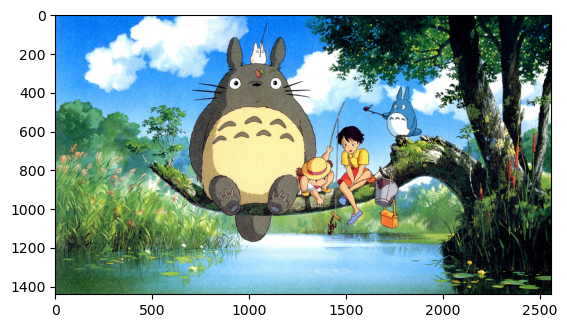

In [3]:
plt.imshow(image)

将上图上下垂直翻转180°。这里使用数组切片的方式来完成，相当于将图片最后一行挪到第一行，倒数第二行挪到第二行，以此类推。
对于行指标，使用切片::-1来表示。-1表示步长，即上下依次倒序。对于列指标和RGB3个颜色通道，仅使用:表示该维度不改变，即取原来的所有的列和通道。


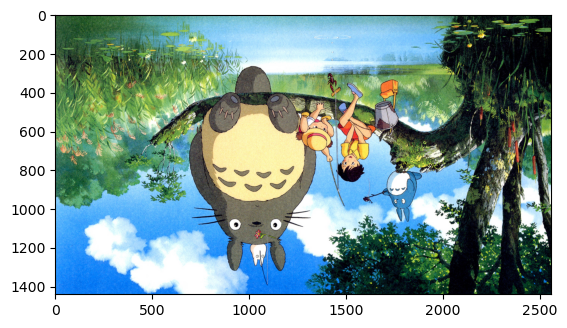

In [4]:
image1 = image[::-1,:,:]
plt.imshow(image1)


也可以对图片左右翻转180°。同样使用数组切片的方式来完成，将列左右互换，相当于将图片最后一列挪到第一列，倒数第二列挪到第二列，以此类推。


水平翻转后输出图像如图所示。

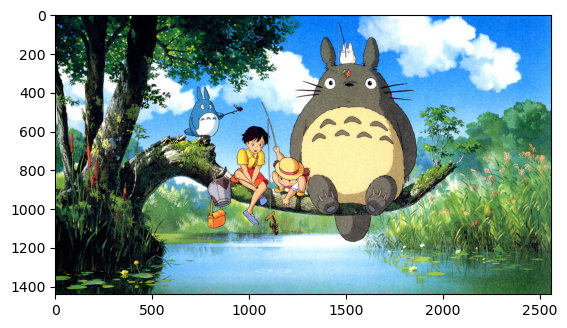

In [5]:
image2 = image[:,::-1,:]
plt.imshow(image2)

图片也可以按照一定的角度进行旋转，如旋转10°，代码如下。
经过旋转处理后的照片输出如图所示

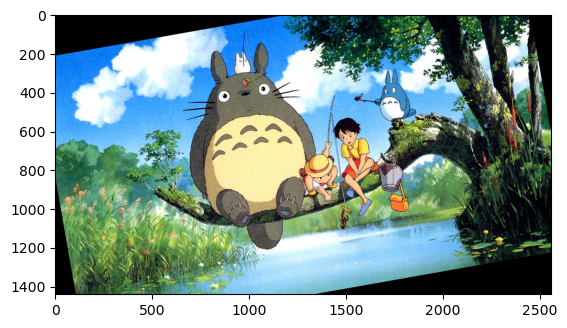

In [6]:
image_0 =Image.open(path).rotate(10)
image_0 = np.array(image_0)
plt.imshow(image_0)


将图片保存到本地。保存之前需要先将数组转化为图像数据格式。  

In [7]:

im2 =Image.fromarray(image_0) #实现array到image的转换  
im2.save('image/im2.jpg')  


图片也可以进行裁剪，高度或宽度都可以裁剪。通过图像的shape可以知道图像的高度H和宽度W。我们在裁剪时，使用数组切片的方法，所以数据必须是整  数。下面取图像的一半的高度，即图像的上半部分裁减掉，保留下半部分，需要对数组的行进行切片。  

裁剪后的图片如图所示!  

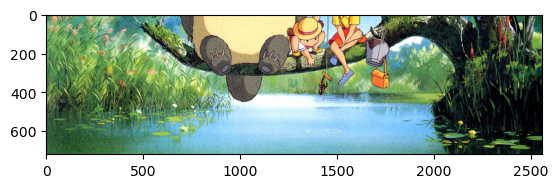

In [8]:
H, W = image.shape[0], image.shape[1]
# 注意此处用整除，H_1必须为整数
H1 = H // 2 
H2 = H
image3 = image[H1:H2,:,:]
plt.imshow(image3)


##### 图片裁剪宽度，需要对图片数组的列进行切片。我们前面已经看到宽度是6527，我们从上图也可知道，如果取图片的右半部分，我们可以从2000处开始  
宽度裁剪后的图片如图所示。


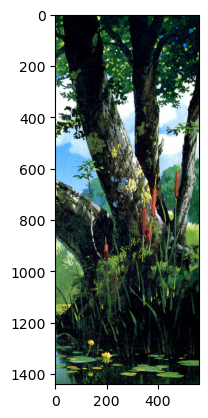

In [9]:
#  宽度方向裁剪
# W1 = 3000
W1 = 2000
image4 = image[:,W1:,:]
plt.imshow(image4)


当然，高度和宽度两个方向也可以同时裁剪。
裁剪后输出图片如图所示。

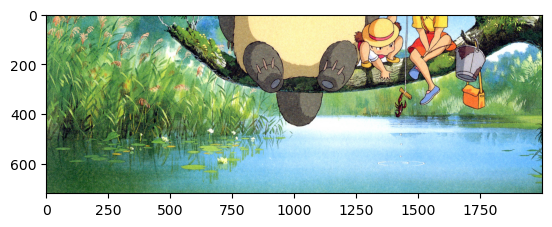

In [10]:
image5 = image[H1:H2,:W1,:]
plt.imshow(image5)

Numpy除了可以对图片利用切片的方法对其进行翻转、裁剪，也可以对其进行明暗程度进行调整。如调整亮度，可以将图像数组乘以倍数，倍数小于1就是降低图片的亮度，反之增加亮度。由于图片的RGB像素值必须在0-255之间，所以要使用np.clip进行数值控制，数组的数值不能大于255。如我们将图片的亮度调至2倍，可以看到图片曝光过度，如图所示

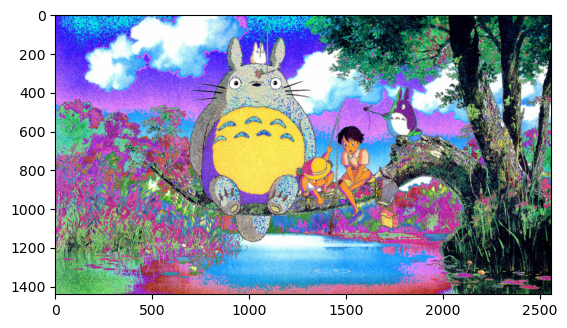

In [11]:
image6 = image *2
image6 = np.clip(image6, a_min=None, a_max=255.)
plt.imshow(image6.astype('uint8'))#转化图像的数据类型为uint8，降低图片精度，节省内存提高运算速度


Numpy还可以利用切片的方法对图片进行压缩，如对图像间隔行列采样，图像尺寸会减半，清晰度相比原图片变差，输出如图所示。

(720, 1280, 3)

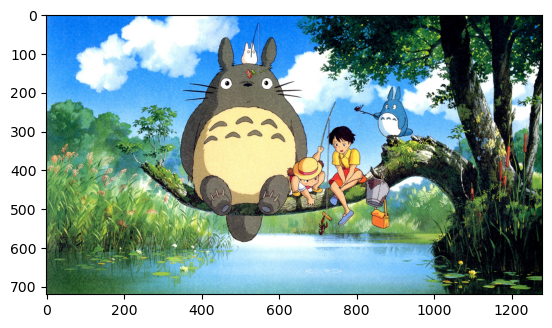

In [12]:
image7 = image[::2,::2,:]#步长为2，隔行、隔列提取，行列压缩为原来的一半
plt.imshow(image7)
image7.shape